In [3]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

# Decoherence

In [12]:
circ = QuantumCircuit(1)

In [13]:
circ.x(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)
circ.iden(0)

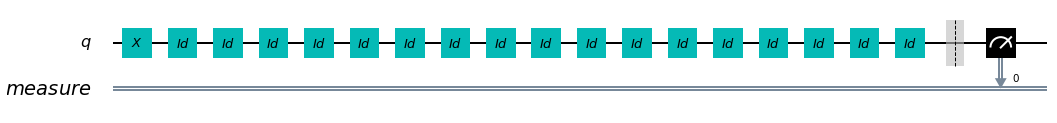

In [14]:
circ.measure_all()
circ.draw()

In [15]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=2048)
result_sim = job_sim.result()

{'1': 2048}


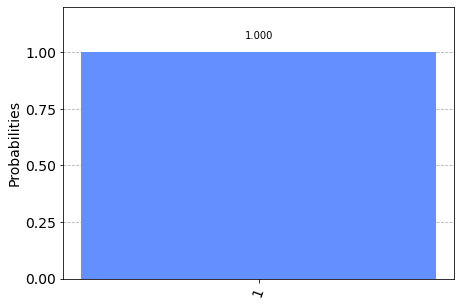

In [16]:
counts = result_sim.get_counts(circ)
print(counts)
plot_histogram(counts)

In [17]:
provider = IBMQ.get_provider(group='open')
backend = provider.get_backend('ibmq_london')

In [18]:
from qiskit.tools.monitor import job_monitor

job_exp = execute(circ, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


In [19]:
result_exp = job_exp.result()

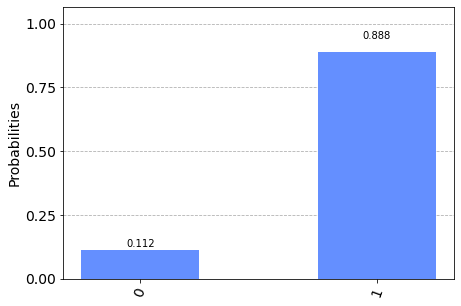

In [20]:
counts_exp = result_exp.get_counts(circ)
plot_histogram(counts_exp)

# Custom quantum circuit

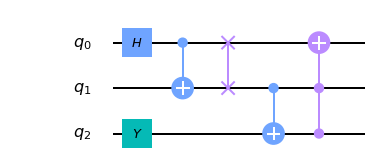

In [7]:
circ = QuantumCircuit(3)
circ.h(0)
circ.cx(0, 1)
circ.y(2)
circ.swap(1, 0)
circ.cnot(1, 2)
circ.ccx(2, 1, 0)
circ.draw()

[0.+0.j    0.+0.j    0.+0.j    0.+0.707j 0.+0.707j 0.+0.j    0.+0.j
 0.+0.j   ]


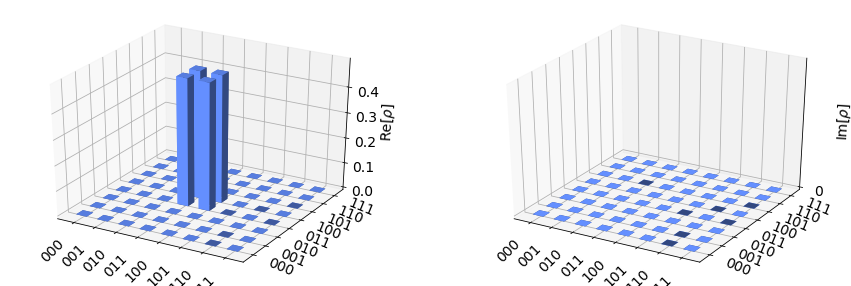

In [12]:
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)

result = job.result()

outputstate = result.get_statevector(circ, decimals=3)
print(outputstate) # Wektor stanu
plot_state_city(outputstate) # Wizualizacja macierzy gęstości

Jeśli wektor stanu oznaczymy jako |X>, to macierz gęstości jest iloczynem |X> <X| 
Dla wektora stanu podanego powyżej: `(0, 0, 0, 0+0.707i, 0+0.707i, 0, 0, 0)`, macierz ta ma postać: 
```
0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0
0	0	0	0.499849	0.499849	0	0	0
0	0	0	0.499849	0.499849	0	0	0
0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0
```
co jest zgodne z wizualizacją

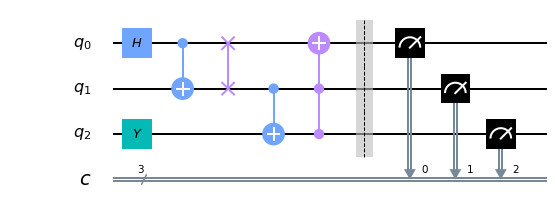

In [14]:
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
meas.measure(range(3), range(3))

qc = circ+meas

qc.draw()

{'011': 523, '100': 501}


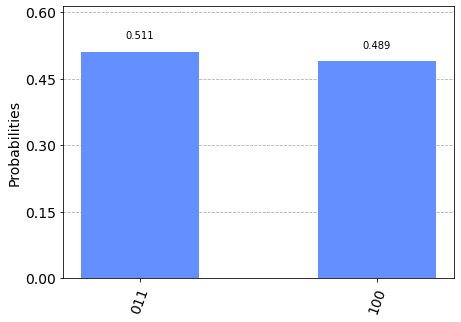

In [25]:
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)
plot_histogram(counts)

Wynik otrzymany z symulatora różni się od wyniku otrzymanego z amplitud stanu. Wektor stanu dla stanów `011` oraz `100` posiada takie same wartości `0+707i`, z których możemy wyliczyć prawdopodobieństwo `1/2` dla obu stanów. Wynik z symulatora różni się od wyniku obliczonego, gdyż symulacja opiera się na wynikach statystycznych natomiast wektor stanu wyliczany jest stosując obliczenia na macierzach. 

In [21]:
from qiskit.tools.monitor import job_monitor
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_5_yorktown')

job_experiment = execute(qc, backend=backend)
job_monitor(job_experiment)

Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


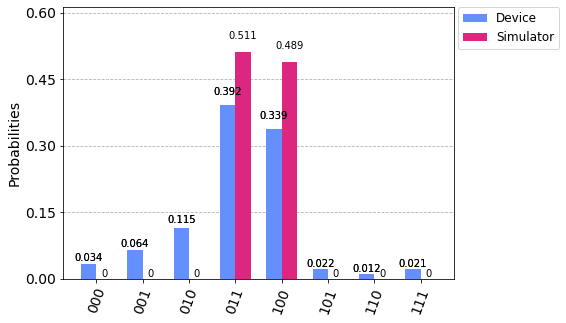

In [26]:
results = job_experiment.result()
dev_counts = results.get_counts(qc)
plot_histogram([dev_counts, counts], legend=['Device', 'Simulator'])

Wyniki z prawdziwego komputera różnią się od wyników z symulatora przede wszystkim przez dekoherencję i błędy nią spowodowane. Każda bramka kwantowa generuje pewien błąd. Również qubity nie mają nieskończonego czasu życia. Wynik jest więc zależny nie tylko od statystyki, ale także od parametrów fizycznych eksperymentu